Importing libraries

In [9]:
!pip install keras-tcn
!pip install keras-tcn --no-dependencies

In [28]:
import math
import matplotlib.pyplot as plt
import numpy as np

import keras 
import pandas as pd


from keras.models import Sequential
from keras.layers import Dense 


from keras.layers import Dropout

from keras.layers import LSTM

from keras.layers import *


from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from keras.callbacks import EarlyStopping

from functools import reduce

from tcn import TCN, tcn_full_summary

# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model
 


Model architecture

In [14]:
def model_arch(x):

    np.random.seed(1)
    model = Sequential()
    model.add(x(nb_filters=64, kernel_size=4, nb_stacks=1, dilations=[1, 2, 4, 8, 16 ], padding='causal', use_skip_connections=False, dropout_rate=0.1, return_sequences=False, activation='relu', input_shape = (60, 1)))
    #model.add(Dropout(0.1))
    model.add(Dense(units = 1))
    model.compile(optimizer = 'adam', loss = 'mean_squared_error')
    return model

model=model_arch(x=TCN)
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
tcn_2 (TCN)                  (None, 64)                148480    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 148,545
Trainable params: 148,545
Non-trainable params: 0
_________________________________________________________________


Helper function


In [15]:
def model_train(file_name,model):

      df = pd.read_csv(file_name)
      dfg=df[0:735]



      training_set = df.iloc[:, 4:5].values ## Used dot values to convert Panda Series  to Numpy Array 

      # Feature Scaling
      sc = MinMaxScaler(feature_range = (0, 1))


      training_set_scaled = sc.fit_transform(training_set)
      
      
      # Creating a data structure with 60 time-steps and 1 output
      X_train = []
      y_train = []
      for i in range(60, dfg.shape[0]):
          X_train.append(training_set_scaled[i-60:i, 0])
          y_train.append(training_set_scaled[i, 0])
      X_train, y_train = np.array(X_train), np.array(y_train)
      X_train = np.reshape(X_train, (X_train.shape[0],  X_train.shape[1], 1))
      X_train.shape
      model.fit(X_train, y_train, epochs = 30, batch_size = 32, verbose=0)
      return model



In [16]:
model = model_train("AMZN.csv", model)
model = model_train("ADBE.csv", model)
model = model_train("GOOG.csv", model)
model = model_train("CMCSA.csv", model)
model = model_train("INTC.csv", model)
model = model_train("NFLX.csv", model)
model = model_train("MSFT.csv", model)
model = model_train("NVDA.csv", model)
model = model_train("QCOM.csv", model)
model = model_train("TXN.csv", model)

In [17]:
model.save("model.h5")

APPLE TCN TL 10

(511, 1)
(451, 60, 1)


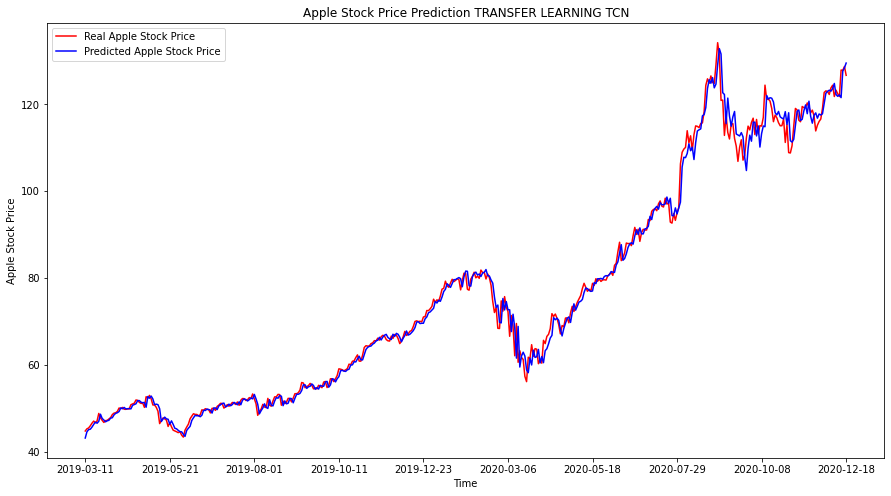

<Figure size 432x288 with 0 Axes>

In [29]:

# load model
model_a = load_model('model.h5', custom_objects={'TCN': TCN})

df=pd.read_csv("AAPL.csv")
dataset_train = df.iloc[:1052, 4:5]
dataset_test = df.iloc[1052:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
sc = MinMaxScaler(feature_range = (0, 1))
inputs = sc.fit_transform(inputs)
print(inputs.shape)
X_test = []
for i in range(60, 511):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = model_a.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(451,) 
x = df.loc[1052: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real Apple Stock Price")
plt.plot(df.loc[1052:, "Date"],predicted_stock_price, color = "blue", label = "Predicted Apple Stock Price")
plt.xticks(np.arange(0,451,50))
plt.title('Apple Stock Price Prediction TRANSFER LEARNING TCN')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show() 
plt.savefig("Apple TL TCN")


In [30]:
abse = mean_absolute_error(predicted_stock_price,y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

1.3900385782857754 2.19534734366288


FB TCN TL 10

(511, 1)
(451, 60, 1)


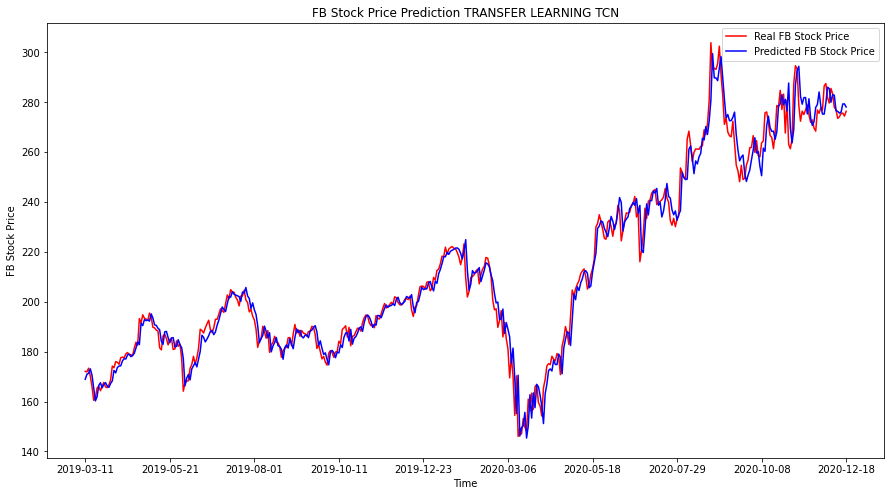

<Figure size 432x288 with 0 Axes>

In [31]:

# load model
model_b = load_model('model.h5', custom_objects={'TCN': TCN})

df=pd.read_csv("FB.csv")
dataset_train = df.iloc[:1052, 4:5]
dataset_test = df.iloc[1052:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
sc = MinMaxScaler(feature_range = (0, 1))
inputs = sc.fit_transform(inputs)
print(inputs.shape)
X_test = []
for i in range(60, 511):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = model_a.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(451,) 
x = df.loc[1052: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real FB Stock Price")
plt.plot(df.loc[1052:, "Date"],predicted_stock_price, color = "blue", label = "Predicted FB Stock Price")
plt.xticks(np.arange(0,451,50))
plt.title('FB Stock Price Prediction TRANSFER LEARNING TCN')
plt.xlabel('Time')
plt.ylabel('FB Stock Price')
plt.legend()
plt.show() 
plt.savefig("FB TL TCN")


In [32]:
abse = mean_absolute_error(predicted_stock_price,y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

3.836425825221296 5.478883684606879


TESLA TCN TL 10

(438, 1)
(378, 60)
(378, 60, 1)


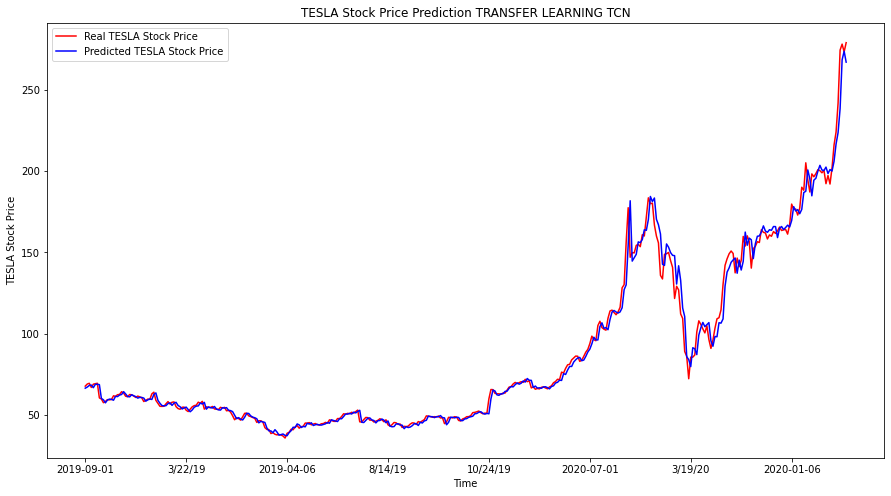

<Figure size 432x288 with 0 Axes>

In [37]:
# load model
model_t = load_model('model.h5', custom_objects={'TCN': TCN})

df=pd.read_csv("TESLA.csv")
dataset_train = df.iloc[:881, 4:5]
dataset_test = df.iloc[881:, 4:5]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
sc = MinMaxScaler(feature_range = (0, 1))
inputs = sc.fit_transform(inputs)
print(inputs.shape)
X_test = []
for i in range(60, 438):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
predicted_stock_price = model_a.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
y =  dataset_test.values.reshape(378,) 
x = df.loc[881: , "Date"] 
# Visualising the results
plt.figure(figsize=(15,8))
plt.plot(x, y, c= "red", label = "Real TESLA Stock Price")
plt.plot(df.loc[881:, "Date"],predicted_stock_price, color = "blue", label = "Predicted TESLA Stock Price")
plt.xticks(np.arange(0,378,50))
plt.title('TESLA Stock Price Prediction TRANSFER LEARNING TCN')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show() 
plt.savefig("TESLA TL TCN")


In [38]:
abse = mean_absolute_error(predicted_stock_price,y)
rmse = math.sqrt(mean_squared_error(predicted_stock_price,y))
print(abse,rmse)

3.1790852865319636 5.89013248448122
